<a href="https://colab.research.google.com/github/hsilva-unam/THC_Semestre_06_01/blob/main/IMD_26_01_VideoDFS_HectorSilva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción a las matemáticas discretas (IMD)**

*UNAM - Facultad de ciencias*

Alumno: Héctor Silva Hernández

Video DFS

v1.0 (03-12-2025)

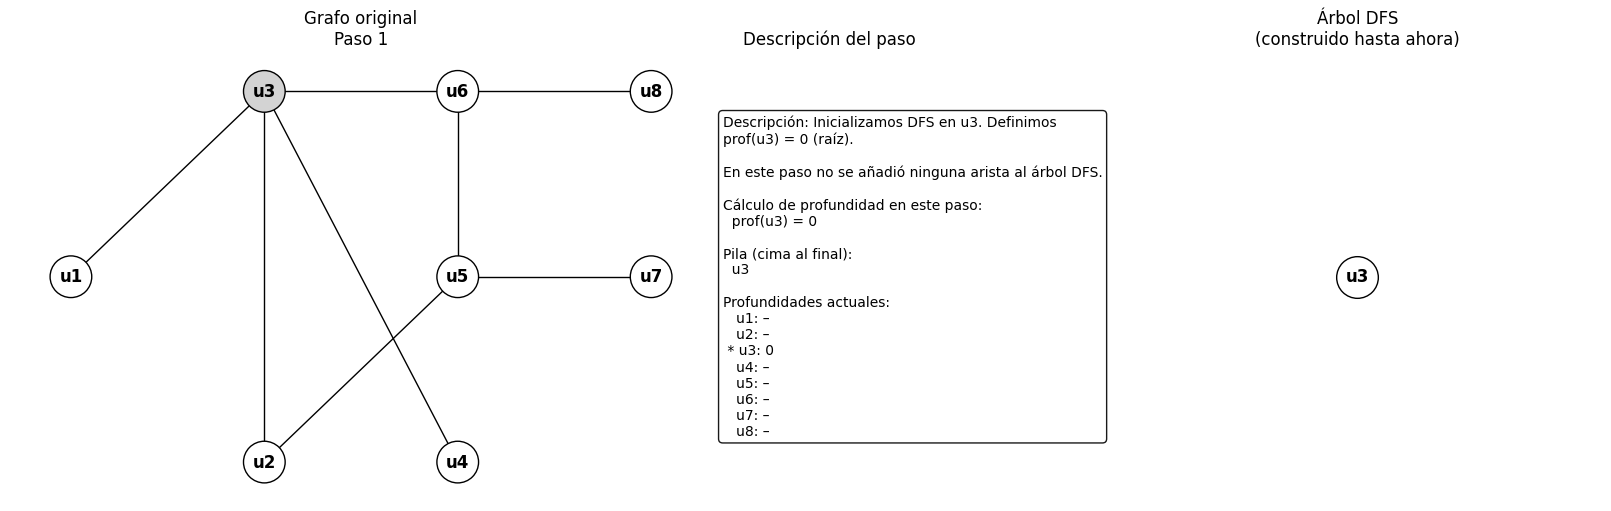

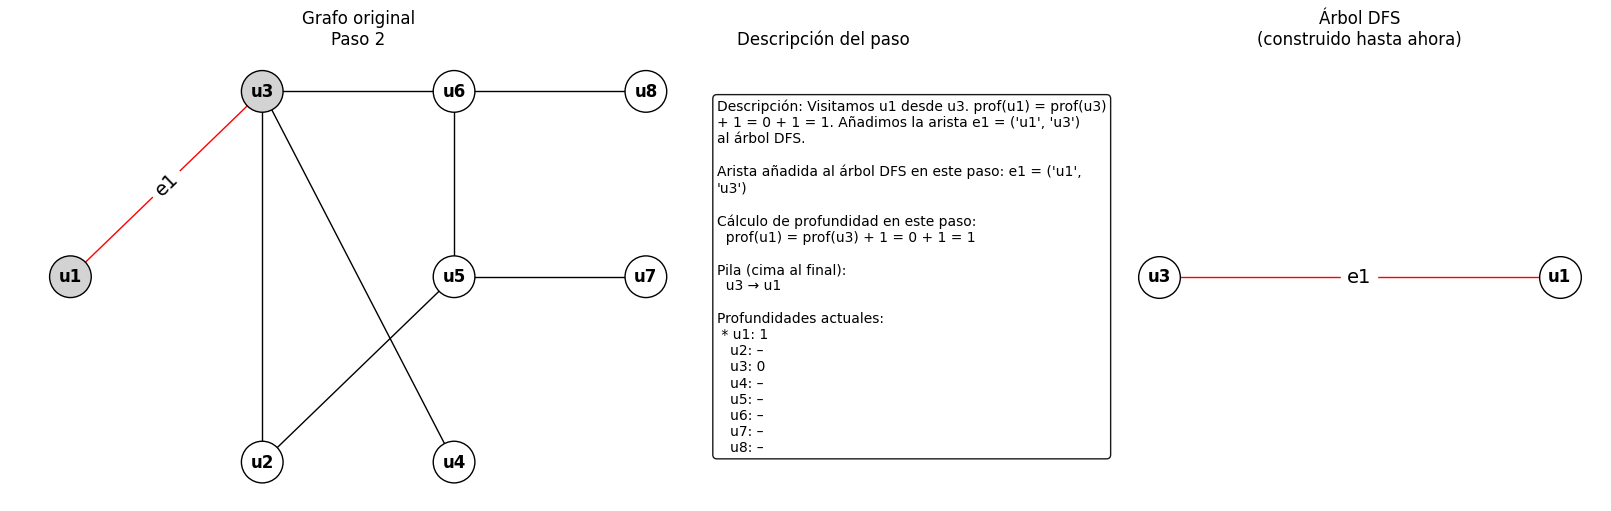

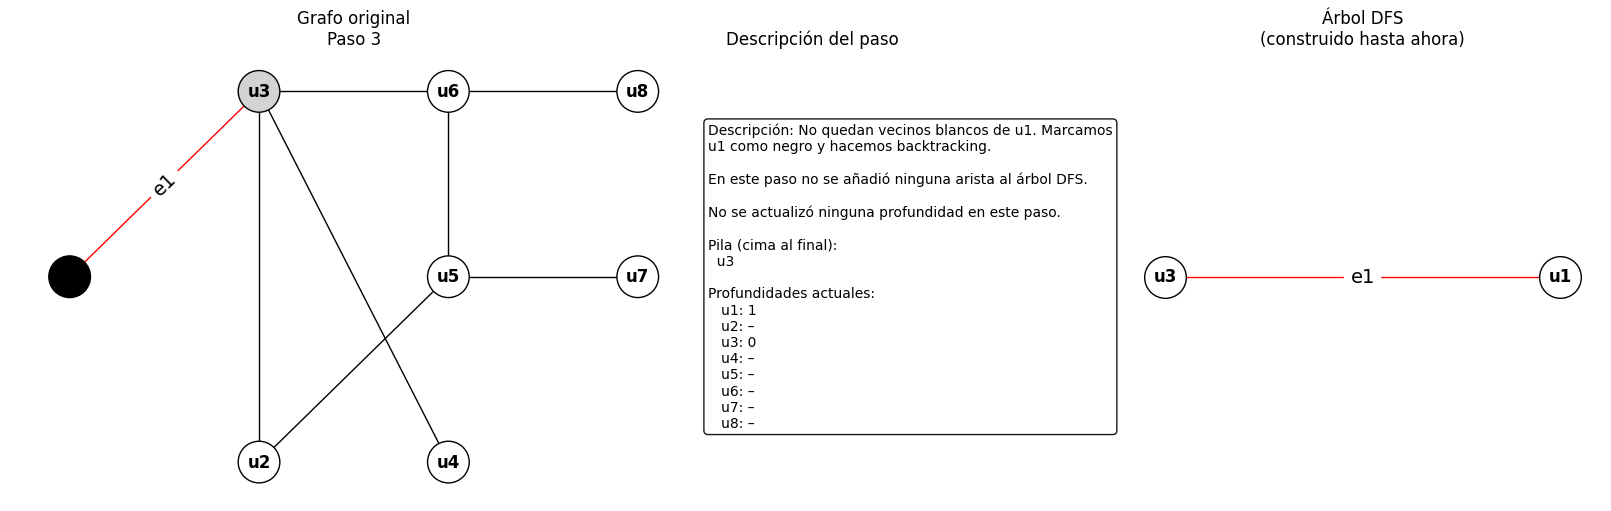

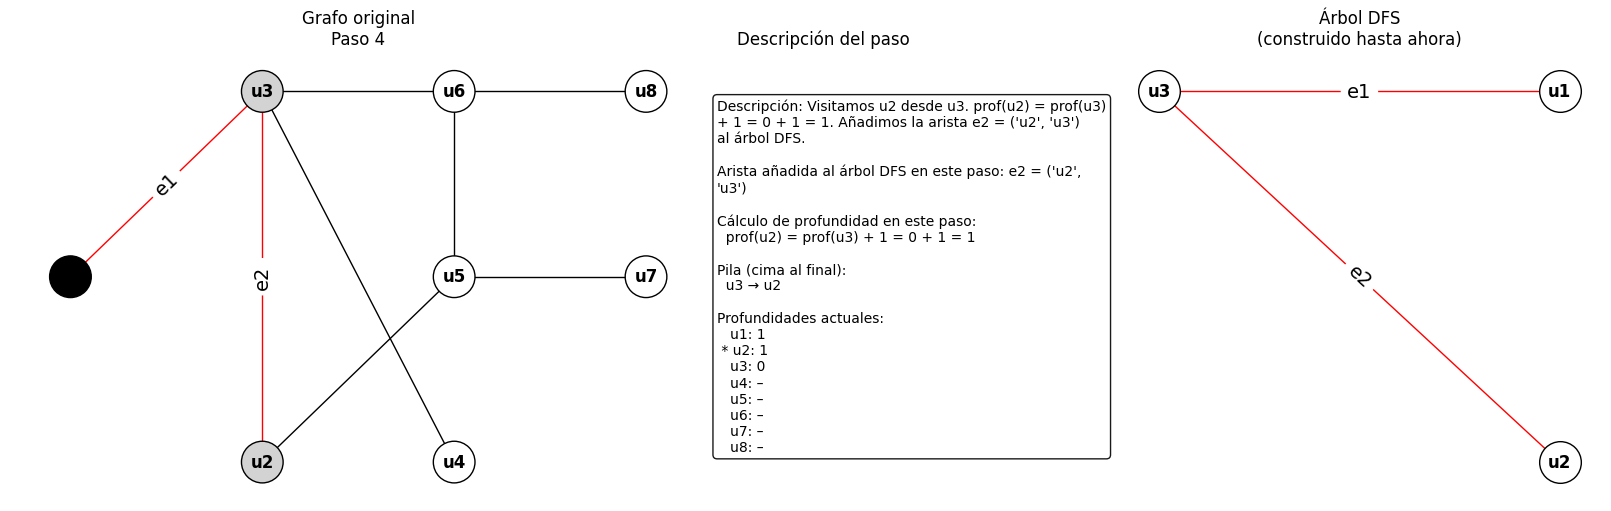

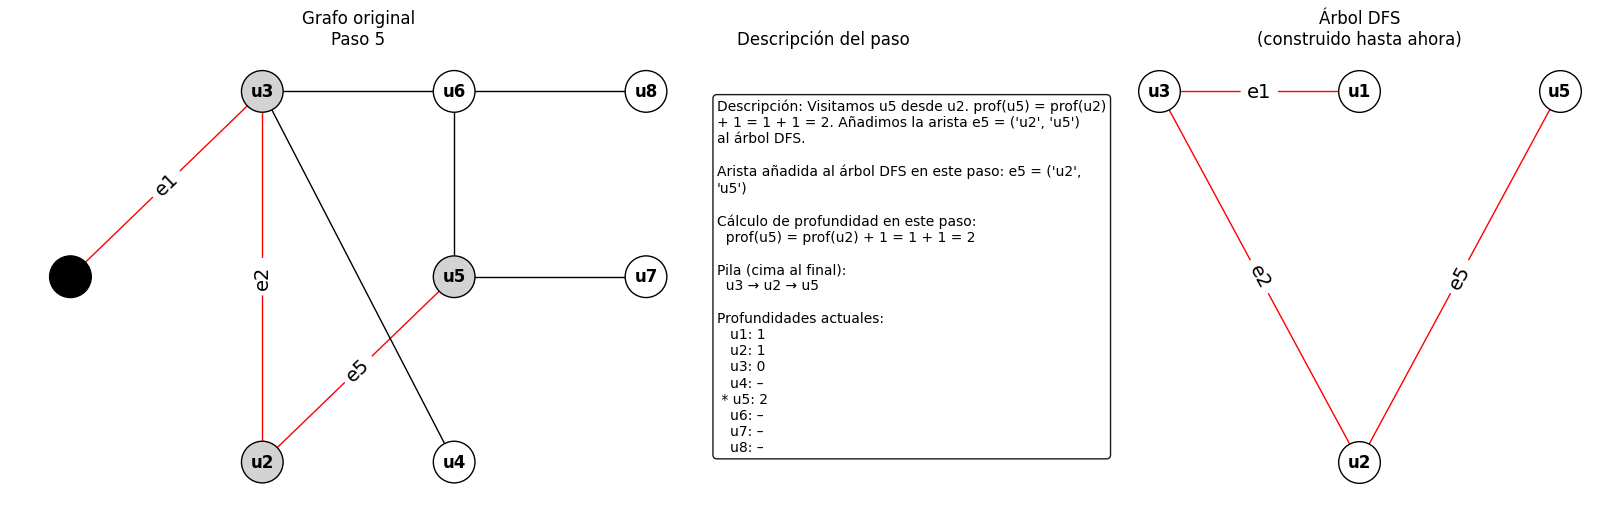

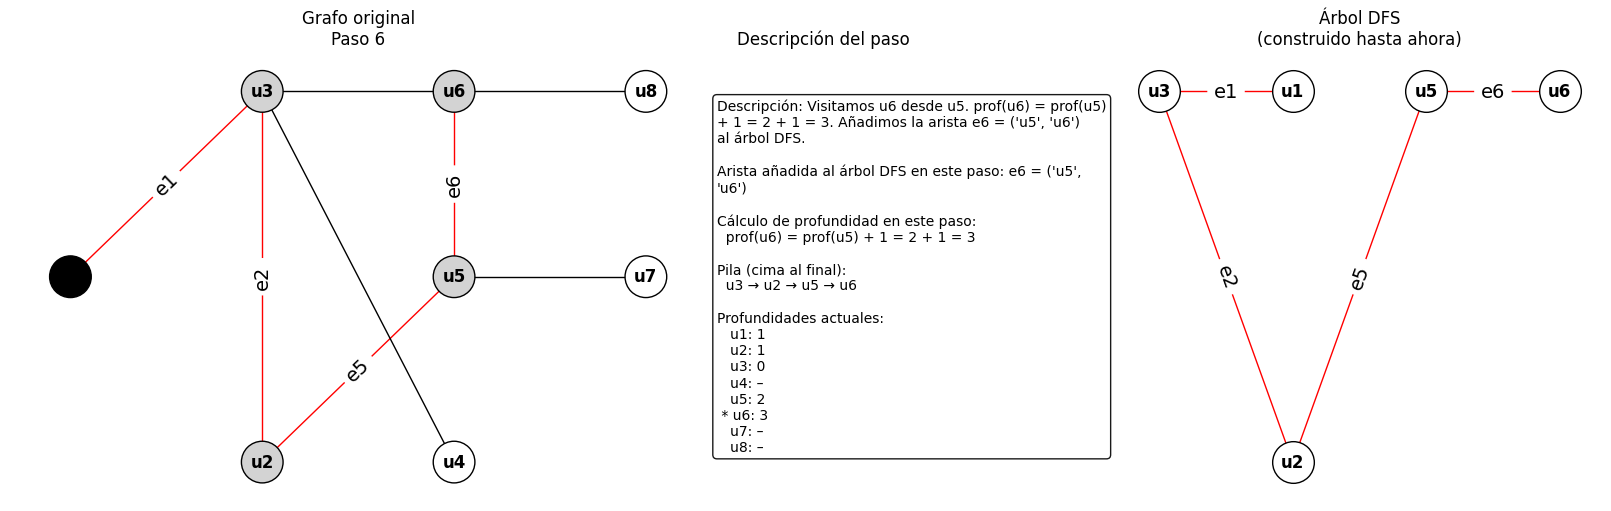

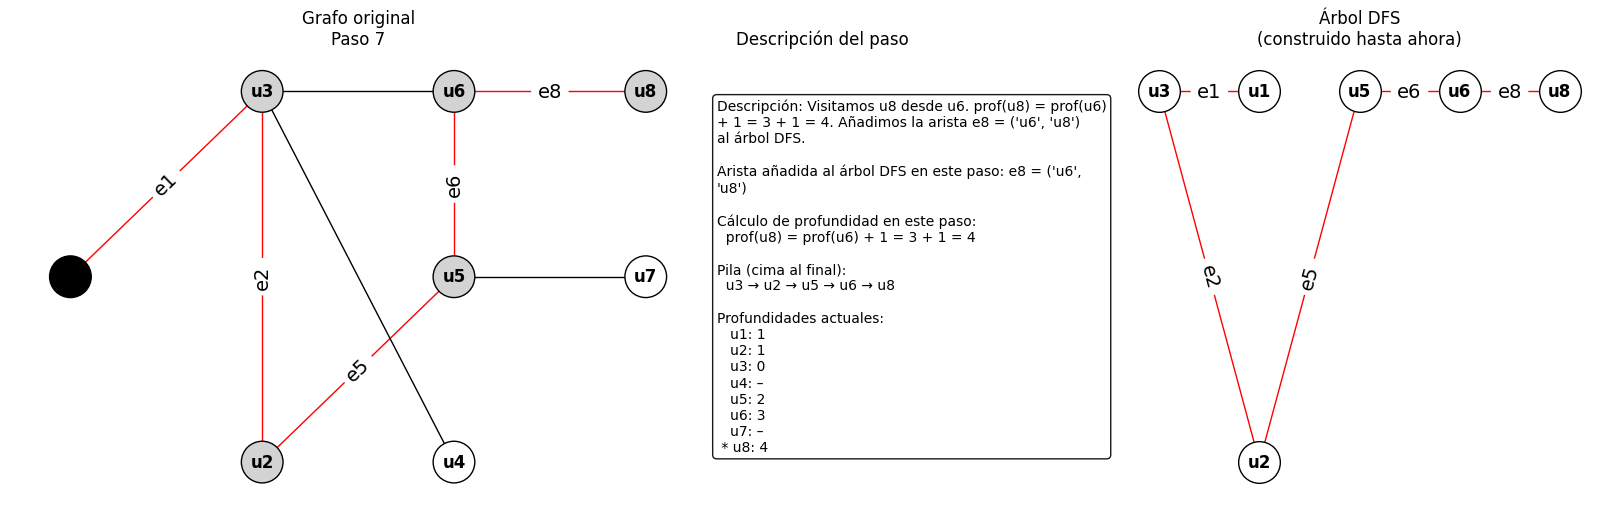

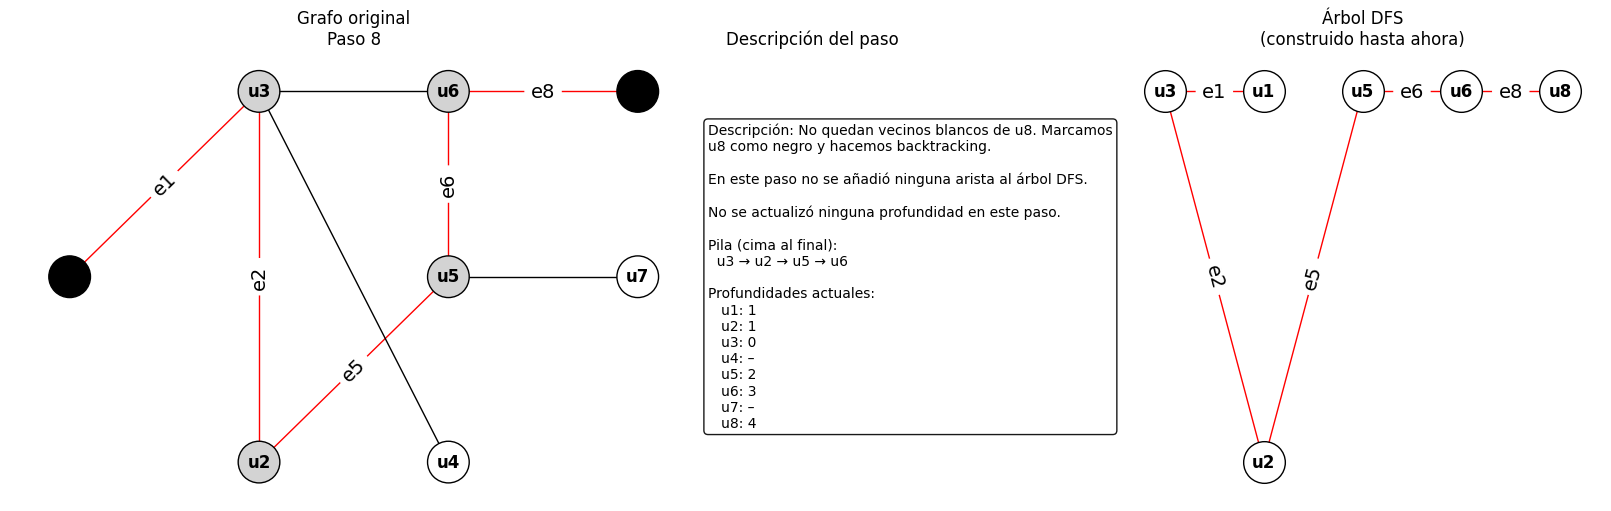

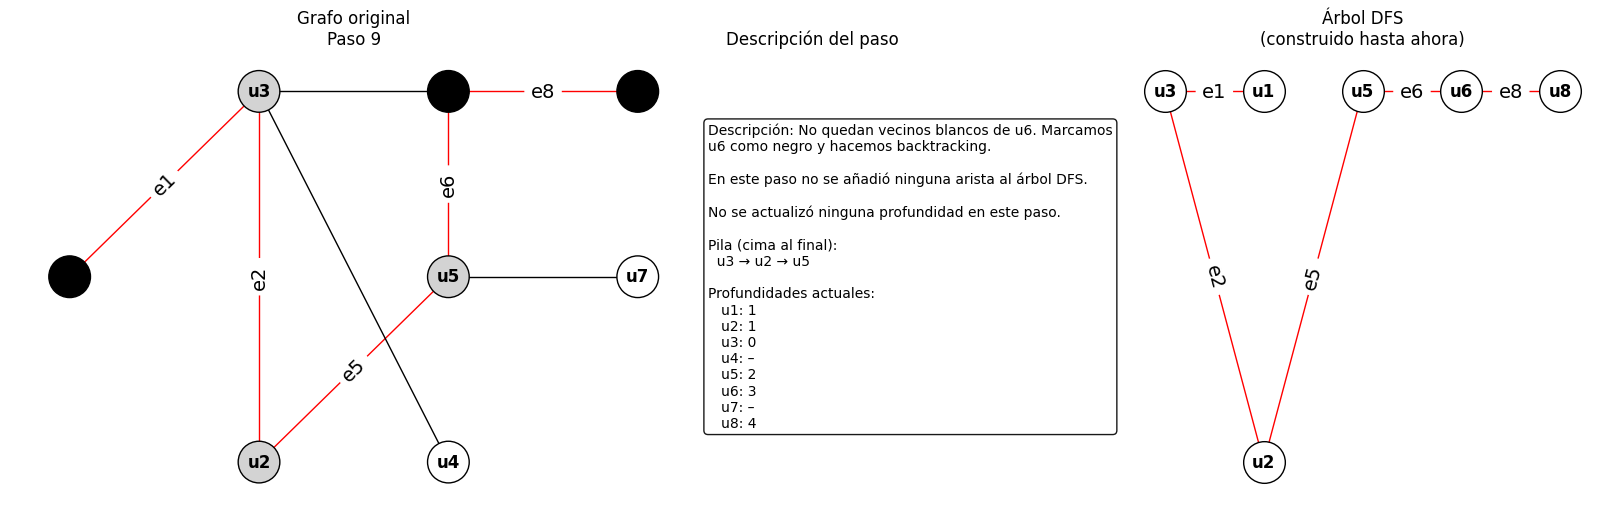

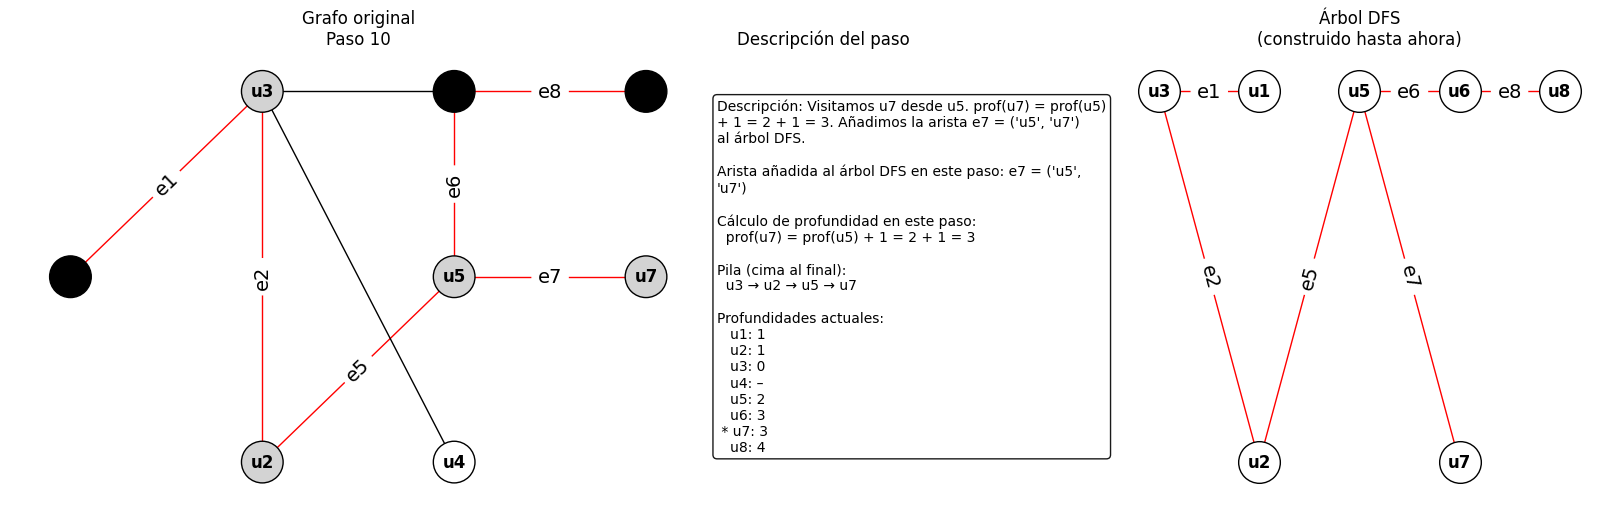

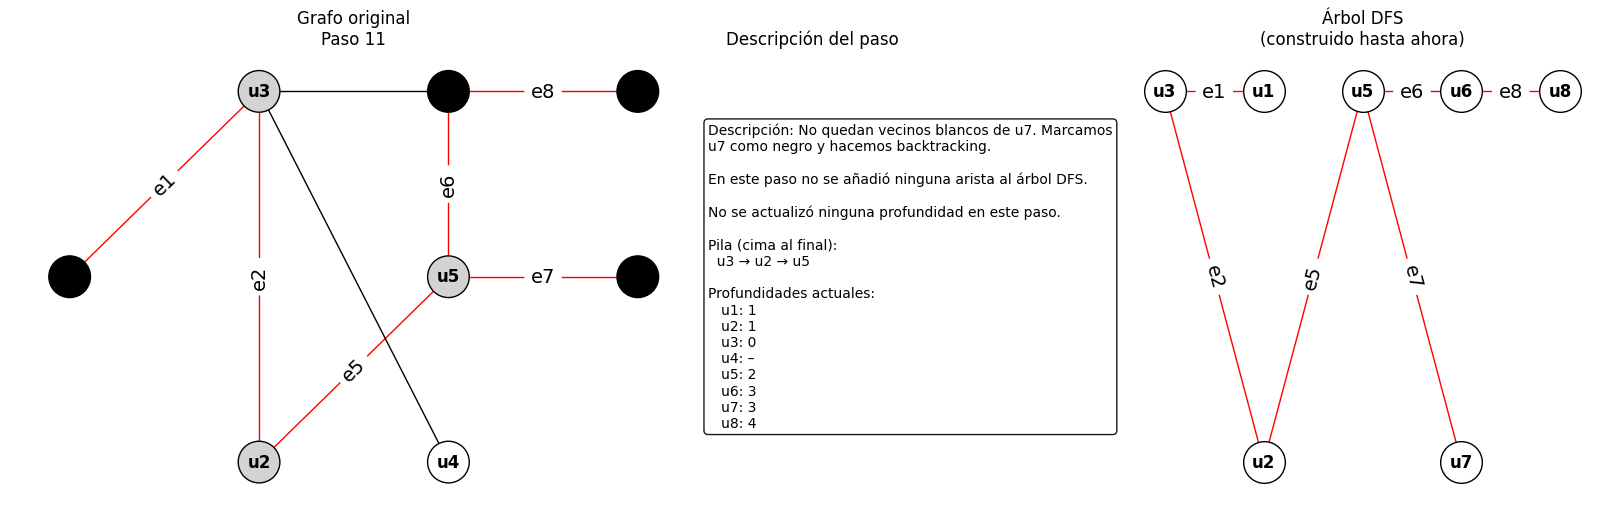

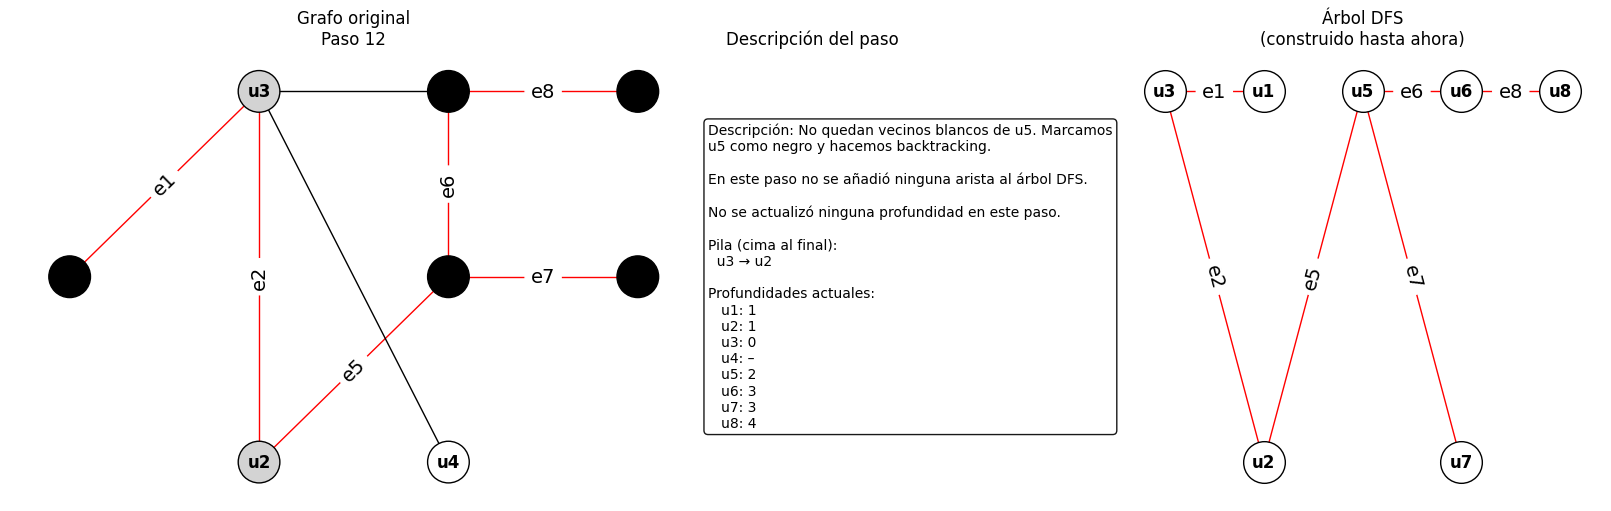

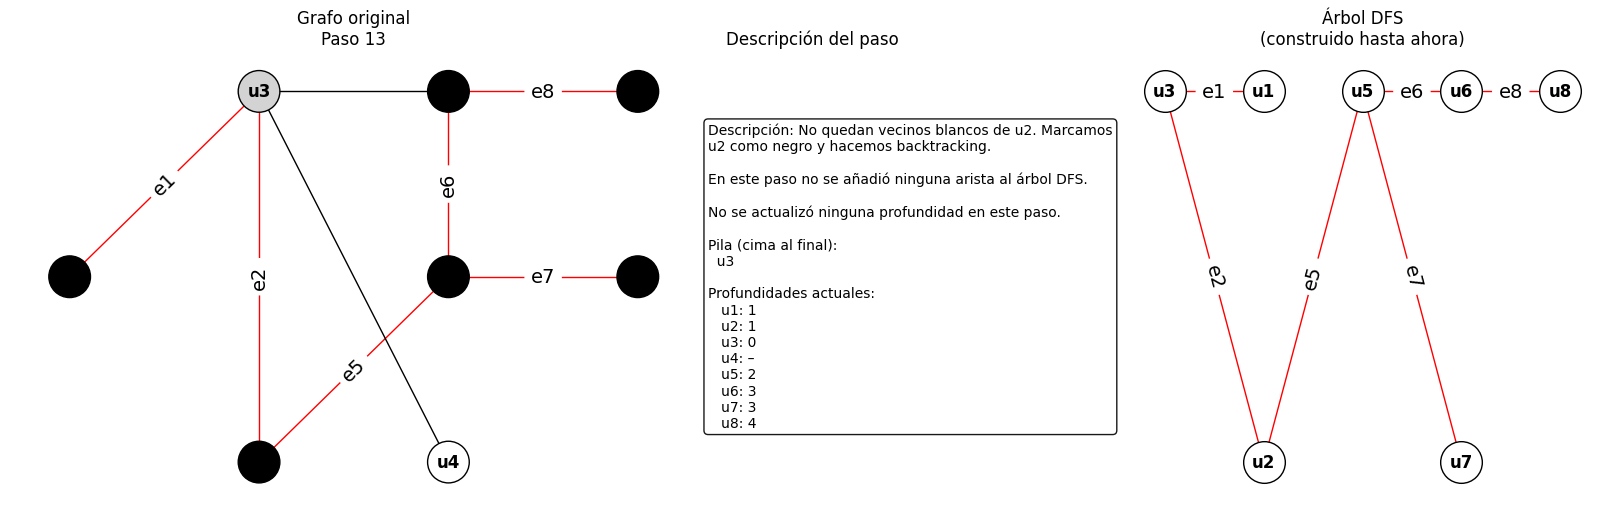

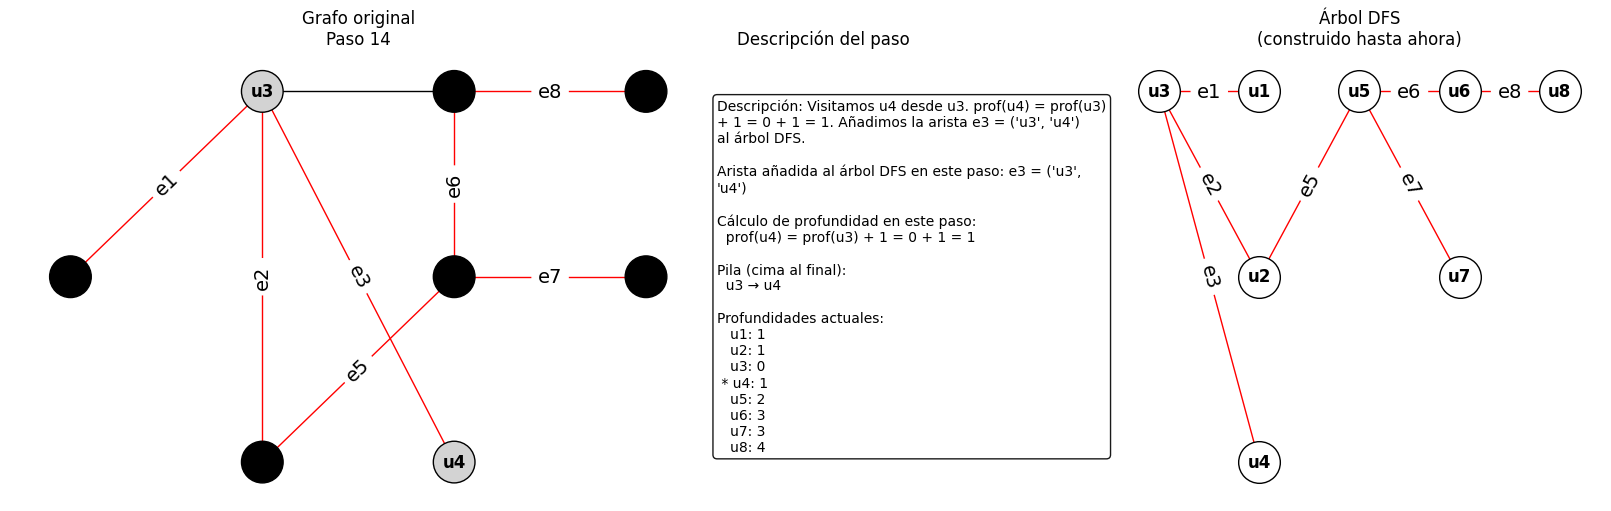

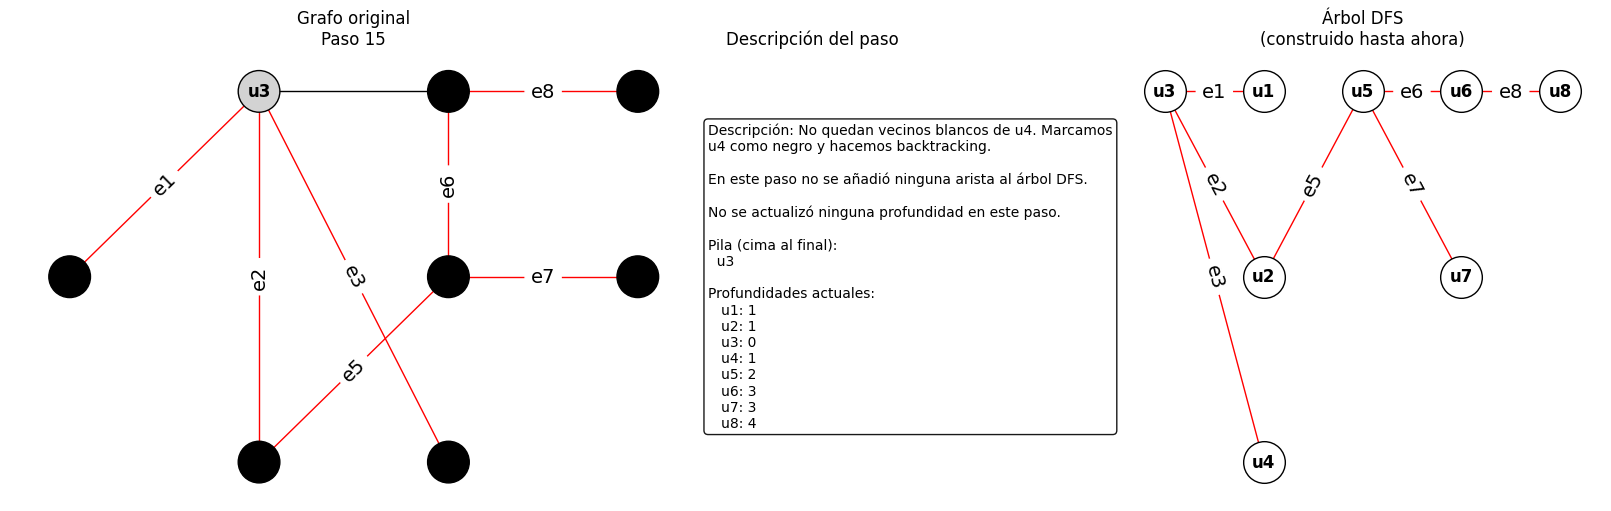

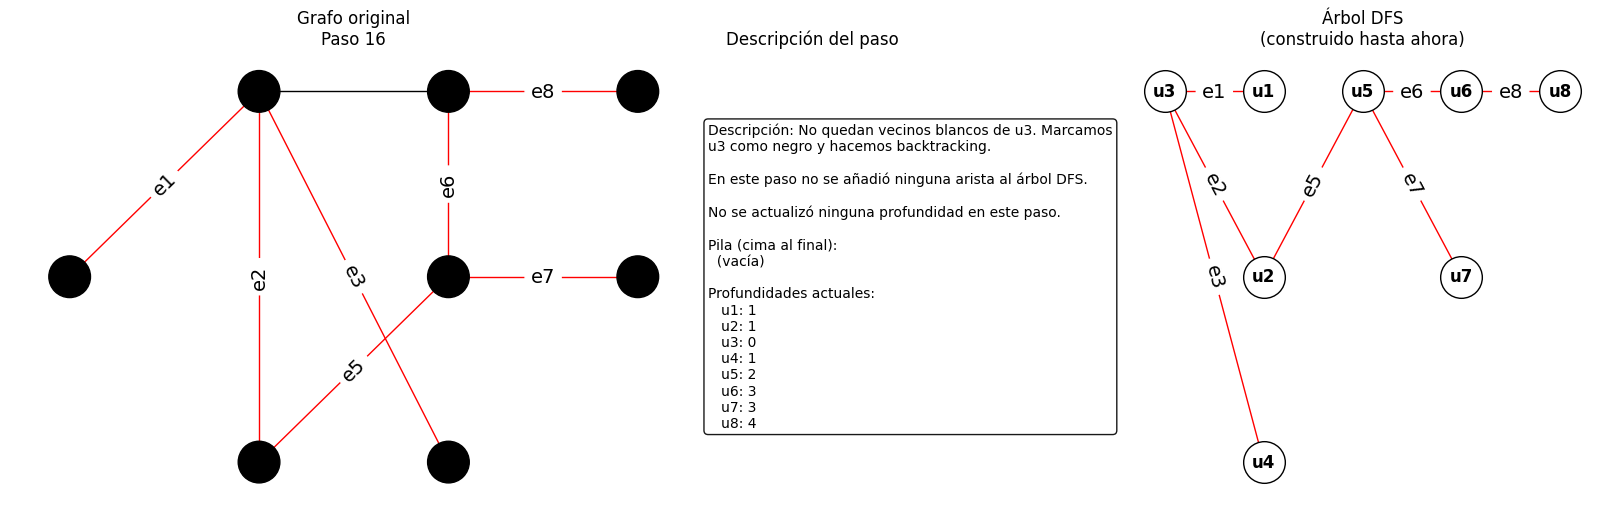

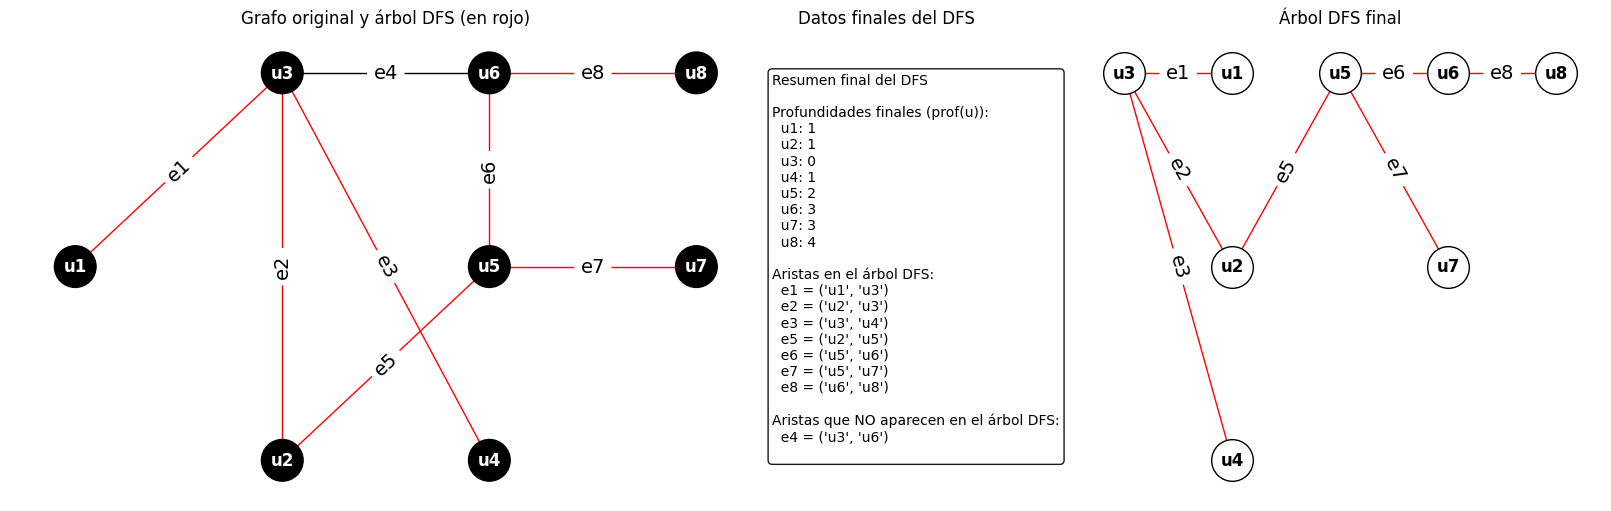

In [6]:
"""
Visualización paso a paso de DFS en el grafo del proyecto,
mostrando:

- Grafo original (columna izquierda, más ancho).
- Cuadro de descripción (columna central, angosto, con texto envuelto).
- Árbol DFS que se va construyendo (columna derecha).

Al final:
- Se muestra un resumen final con:
    - grafo original,
    - árbol DFS resultante,
    - cuadro de datos finales (profundidades, aristas del árbol,
      y aristas que NO aparecen en el árbol DFS).

Requisitos:
    pip install networkx matplotlib
"""

import matplotlib.pyplot as plt
import networkx as nx
import textwrap

# ---------------------------------------------------------
# 1. Definir el grafo del proyecto
# ---------------------------------------------------------

G = nx.Graph()

nodes = ["u1", "u2", "u3", "u4", "u5", "u6", "u7", "u8"]
G.add_nodes_from(nodes)

# Aristas según la figura del proyecto
edges = [
    ("u1", "u3"),
    ("u2", "u3"),
    ("u3", "u4"),
    ("u3", "u6"),
    ("u2", "u5"),
    ("u5", "u6"),
    ("u5", "u7"),
    ("u6", "u8"),
]
G.add_edges_from(edges)

# Diccionario de nombres de aristas (usamos tuplas ORDENADAS como clave)
edge_names = {}
edge_names[tuple(sorted(("u1", "u3")))] = "e1"
edge_names[tuple(sorted(("u2", "u3")))] = "e2"
edge_names[tuple(sorted(("u3", "u4")))] = "e3"
edge_names[tuple(sorted(("u3", "u6")))] = "e4"
edge_names[tuple(sorted(("u2", "u5")))] = "e5"
edge_names[tuple(sorted(("u5", "u6")))] = "e6"
edge_names[tuple(sorted(("u5", "u7")))] = "e7"
edge_names[tuple(sorted(("u6", "u8")))] = "e8"

# Posiciones aproximadas del grafo original
pos = {
    "u1": (-1.0, 0.5),
    "u3": (0.0, 1.0),
    "u2": (0.0, 0.0),
    "u4": (1.0, 0.0),
    "u6": (1.0, 1.0),
    "u5": (1.0, 0.5),
    "u7": (2.0, 0.5),
    "u8": (2.0, 1.0),
}

# ---------------------------------------------------------
# 2. DFS con pila explícita, guardando estados
# ---------------------------------------------------------

def dfs_with_states(G, start):
    """
    Ejecuta DFS iterativo con pila y devuelve una lista de 'states'.

    Cada state es un diccionario con:
        - 'current': nodo actual (o None)
        - 'colors': dict nodo -> 'white'/'gray'/'black'
        - 'tree_edges': conjunto de aristas del árbol DFS (set de tuplas)
        - 'stack': copia de la pila actual (lista)
        - 'depth': dict nodo -> profundidad (nivel) desde start (o None)
        - 'desc': descripción textual del paso
        - 'last_depth_node': nodo cuya profundidad se actualizó
        - 'last_depth_expl': string con la cuenta de profundidad
        - 'last_tree_edge': arista añadida al árbol en este paso (o None)
        - 'last_tree_edge_name': nombre de la arista (e1, e2, ...) o None
    """
    colors = {u: "white" for u in G.nodes()}
    depth = {u: None for u in G.nodes()}
    tree_edges = set()
    stack = []

    states = []

    def save_state(current, desc,
                   last_depth_node=None,
                   last_depth_expl="",
                   last_tree_edge=None,
                   last_tree_edge_name=None):
        states.append(
            {
                "current": current,
                "colors": colors.copy(),
                "tree_edges": set(tree_edges),
                "stack": list(stack),
                "depth": depth.copy(),
                "desc": desc,
                "last_depth_node": last_depth_node,
                "last_depth_expl": last_depth_expl,
                "last_tree_edge": last_tree_edge,
                "last_tree_edge_name": last_tree_edge_name,
            }
        )

    # Inicializamos en el nodo start
    colors[start] = "gray"
    depth[start] = 0
    stack.append(start)
    save_state(
        start,
        f"Inicializamos DFS en {start}. Definimos prof({start}) = 0 (raíz).",
        last_depth_node=start,
        last_depth_expl=f"prof({start}) = 0",
        last_tree_edge=None,
        last_tree_edge_name=None,
    )

    # Bucle principal de la pila
    while stack:
        u = stack[-1]  # vértice en la cima de la pila

        # Vecinos blancos de u, ordenados por índice (u1, u2, ..., u8)
        white_neighbors = sorted(
            [v for v in G.neighbors(u) if colors[v] == "white"],
            key=lambda x: int(x[1:]) if x.startswith("u") and x[1:].isdigit() else x,
        )

        if white_neighbors:
            # Elegimos el primer vecino blanco
            v = white_neighbors[0]
            colors[v] = "gray"
            depth[v] = depth[u] + 1

            edge = tuple(sorted((u, v)))
            tree_edges.add(edge)

            # Nombre de la arista (e1, e2, ..., según edge_names)
            edge_name = edge_names.get(edge, "")

            stack.append(v)

            expl = f"prof({v}) = prof({u}) + 1 = {depth[u]} + 1 = {depth[v]}"
            if edge_name:
                desc = (
                    f"Visitamos {v} desde {u}. {expl}. "
                    f"Añadimos la arista {edge_name} = {edge} al árbol DFS."
                )
            else:
                desc = (
                    f"Visitamos {v} desde {u}. {expl}. "
                    f"Añadimos la arista {edge} al árbol DFS."
                )

            save_state(
                v,
                desc,
                last_depth_node=v,
                last_depth_expl=expl,
                last_tree_edge=edge,
                last_tree_edge_name=edge_name,
            )
        else:
            # No quedan vecinos blancos → backtracking
            colors[u] = "black"
            stack.pop()
            desc = (
                f"No quedan vecinos blancos de {u}. "
                f"Marcamos {u} como negro y hacemos backtracking."
            )

            save_state(
                None,
                desc,
                last_depth_node=None,
                last_depth_expl="",
                last_tree_edge=None,
                last_tree_edge_name=None,
            )

    return states


states = dfs_with_states(G, "u3")

# ---------------------------------------------------------
# 3. Helper para envolver texto
# ---------------------------------------------------------

def wrap_lines(lines, width=60):
    """
    Aplica textwrap.wrap a cada línea para que no queden extremadamente largas.
    Devuelve una nueva lista de líneas ya envueltas.
    """
    wrapped = []
    for line in lines:
        sublines = textwrap.wrap(line, width=width)
        if not sublines:
            wrapped.append("")
        else:
            wrapped.extend(sublines)
    return wrapped

# ---------------------------------------------------------
# 4. Dibujo de un estado intermedio (3 columnas: grafo, texto, árbol)
# ---------------------------------------------------------

def draw_state(G, pos, state, step_number):
    colors = state["colors"]
    tree_edges = state["tree_edges"]
    stack = state["stack"]
    depth = state["depth"]
    desc = state["desc"]
    last_depth_node = state["last_depth_node"]
    last_depth_expl = state["last_depth_expl"]
    last_tree_edge = state["last_tree_edge"]
    last_tree_edge_name = state["last_tree_edge_name"]

    # Cerramos figuras anteriores y creamos una nueva
    plt.close('all')
    fig, (ax_graph, ax_info, ax_tree) = plt.subplots(
        1,
        3,
        figsize=(16, 5),
        gridspec_kw={"width_ratios": [2.3, 0.7, 1.6]},  # grafo ancho, cuadro angosto
        constrained_layout=True,
    )

    # --- Columna 1: grafo original ---
    node_colors = []
    for u in G.nodes():
        if colors[u] == "white":
            node_colors.append("white")
        elif colors[u] == "gray":
            node_colors.append("lightgray")
        else:
            node_colors.append("black")

    edgecolors = ["black"] * len(G.nodes())

    edge_colors = []
    for (u, v) in G.edges():
        if tuple(sorted((u, v))) in tree_edges:
            edge_colors.append("red")  # aristas del árbol DFS
        else:
            edge_colors.append("black")

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        edge_color=edge_colors,
        edgecolors=edgecolors,
        node_size=900,
        font_color="black",
        font_weight="bold",
        ax=ax_graph,
    )
    ax_graph.set_title(f"Grafo original\nPaso {step_number}")
    ax_graph.axis("off")

    # Etiquetas de aristas (solo para las que ya están en tree_edges)
    edge_labels_for_graph = {
        e: edge_names[e] for e in tree_edges if e in edge_names
    }
    if edge_labels_for_graph:
        nx.draw_networkx_edge_labels(
            G,
            pos,
            edge_labels=edge_labels_for_graph,
            font_size=14,
            ax=ax_graph,
        )

    # --- Columna 2: cuadro de descripción (con texto envuelto) ---
    info_lines = []
    info_lines.append(f"Descripción: {desc}")
    info_lines.append("")

    if last_tree_edge is not None:
        if last_tree_edge_name:
            info_lines.append(
                f"Arista añadida al árbol DFS en este paso: "
                f"{last_tree_edge_name} = {last_tree_edge}"
            )
        else:
            info_lines.append(
                f"Arista añadida al árbol DFS en este paso: {last_tree_edge}"
            )
    else:
        info_lines.append("En este paso no se añadió ninguna arista al árbol DFS.")
    info_lines.append("")

    if last_depth_node is not None:
        info_lines.append("Cálculo de profundidad en este paso:")
        info_lines.append(f"  {last_depth_expl}")
    else:
        info_lines.append("No se actualizó ninguna profundidad en este paso.")
    info_lines.append("")

    info_lines.append("Pila (cima al final):")
    info_lines.append("  " + " → ".join(stack) if stack else "  (vacía)")
    info_lines.append("")
    info_lines.append("Profundidades actuales:")
    for u in sorted(G.nodes(), key=lambda x: int(x[1:])):
        d = depth[u]
        d_text = "–" if d is None else str(d)
        marker = "*" if u == last_depth_node else " "
        info_lines.append(f" {marker} {u}: {d_text}")

    # Envolver texto para que no queden líneas larguísimas
    wrapped_info_lines = wrap_lines(info_lines, width=55)
    text_to_show = "\n".join(wrapped_info_lines)

    ax_info.axis("off")
    ax_info.text(
        0.0,
        0.5,
        text_to_show,
        fontsize=10,
        va="center",
        ha="left",
        transform=ax_info.transAxes,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.9),
    )
    ax_info.set_title("Descripción del paso")

    # --- Columna 3: árbol DFS parcial ---
    T = nx.Graph()
    for u in G.nodes():
        if depth[u] is not None:
            T.add_node(u)
    for e in tree_edges:
        T.add_edge(*e)

    ax_tree.clear()
    if len(T.nodes()) > 0:
        # Posicionamos los nodos del árbol por niveles de profundidad
        levels = {}
        for u in T.nodes():
            d = depth[u]
            levels.setdefault(d, []).append(u)

        pos_tree = {}
        for d, verts in sorted(levels.items()):
            for i, u in enumerate(
                sorted(verts, key=lambda x: int(x[1:]) if x[1:].isdigit() else x)
            ):
                pos_tree[u] = (d, -i)

        nx.draw(
            T,
            pos_tree,
            with_labels=True,
            node_color="white",
            edge_color="red",
            edgecolors="black",
            node_size=900,
            font_color="black",
            font_weight="bold",
            ax=ax_tree,
        )
        ax_tree.set_title("Árbol DFS\n(construido hasta ahora)")
        ax_tree.axis("off")

        # Etiquetas de aristas en el árbol DFS
        edge_labels_for_tree = {
            e: edge_names[e] for e in T.edges() if e in edge_names
        }
        if edge_labels_for_tree:
            nx.draw_networkx_edge_labels(
                T,
                pos_tree,
                edge_labels=edge_labels_for_tree,
                font_size=14,
                ax=ax_tree,
            )
    else:
        ax_tree.set_visible(False)

    return fig


# ---------------------------------------------------------
# 5. Dibujo del estado FINAL (resumen)
# ---------------------------------------------------------

def draw_final_state(G, pos, final_state):
    """
    Muestra el grafo original, el árbol DFS resultante y
    un cuadro de datos finales, incluyendo:
        - profundidades finales
        - aristas del árbol DFS
        - aristas que NO aparecen en el árbol DFS
    """
    colors = final_state["colors"]
    tree_edges = final_state["tree_edges"]
    depth = final_state["depth"]

    # Computar aristas que NO aparecen en el árbol DFS
    all_edges = {tuple(sorted(e)) for e in G.edges()}
    tree_edges_set = {tuple(sorted(e)) for e in tree_edges}
    non_tree_edges = sorted(all_edges - tree_edges_set)

    # Cerramos figuras anteriores y creamos una nueva
    plt.close('all')
    fig, (ax_graph, ax_info, ax_tree) = plt.subplots(
        1,
        3,
        figsize=(16, 5),
        gridspec_kw={"width_ratios": [2.3, 0.7, 1.6]},
        constrained_layout=True,
    )

    # --- Columna 1: grafo original completo ---
    node_colors = []
    for u in G.nodes():
        # Para el resumen final, podemos marcar todos como negros (terminados)
        # o respetar colors[u]. Aquí usamos negro si está visitado.
        if depth[u] is None:
            node_colors.append("white")
        else:
            node_colors.append("black")

    edgecolors = ["black"] * len(G.nodes())

    # Todas las aristas del grafo, pero las del árbol DFS en rojo
    edge_colors = []
    for (u, v) in G.edges():
        if tuple(sorted((u, v))) in tree_edges_set:
            edge_colors.append("red")
        else:
            edge_colors.append("black")

    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color=node_colors,
        edge_color=edge_colors,
        edgecolors=edgecolors,
        node_size=900,
        font_color="white",
        font_weight="bold",
        ax=ax_graph,
    )
    ax_graph.set_title("Grafo original y árbol DFS (en rojo)")
    ax_graph.axis("off")

    # Etiquetas de TODAS las aristas según edge_names
    edge_labels_for_graph = {
        tuple(sorted(e)): edge_names[tuple(sorted(e))]
        for e in G.edges()
        if tuple(sorted(e)) in edge_names
    }
    if edge_labels_for_graph:
        nx.draw_networkx_edge_labels(
            G,
            pos,
            edge_labels=edge_labels_for_graph,
            font_size=14,
            ax=ax_graph,
        )

    # --- Columna 2: cuadro de datos finales ---
    info_lines = []
    info_lines.append("Resumen final del DFS")
    info_lines.append("")

    # Profundidades finales
    info_lines.append("Profundidades finales (prof(u)):")
    for u in sorted(G.nodes(), key=lambda x: int(x[1:])):
        d = depth[u]
        d_text = "–" if d is None else str(d)
        info_lines.append(f"  {u}: {d_text}")
    info_lines.append("")

    # Aristas del árbol DFS
    info_lines.append("Aristas en el árbol DFS:")
    if tree_edges_set:
        for e in sorted(tree_edges_set, key=lambda x: edge_names.get(x, "")):
            name = edge_names.get(e, "")
            if name:
                info_lines.append(f"  {name} = {e}")
            else:
                info_lines.append(f"  {e}")
    else:
        info_lines.append("  (ninguna)")
    info_lines.append("")

    # Aristas que NO aparecen en el árbol DFS
    info_lines.append("Aristas que NO aparecen en el árbol DFS:")
    if non_tree_edges:
        for e in non_tree_edges:
            name = edge_names.get(e, "")
            if name:
                info_lines.append(f"  {name} = {e}")
            else:
                info_lines.append(f"  {e}")
    else:
        info_lines.append("  (ninguna)")
    info_lines.append("")

    wrapped_info_lines = wrap_lines(info_lines, width=55)
    text_to_show = "\n".join(wrapped_info_lines)

    ax_info.axis("off")
    ax_info.text(
        0.0,
        0.5,
        text_to_show,
        fontsize=10,
        va="center",
        ha="left",
        transform=ax_info.transAxes,
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.9),
    )
    ax_info.set_title("Datos finales del DFS")

    # --- Columna 3: árbol DFS final ---
    T = nx.Graph()
    for u in G.nodes():
        if depth[u] is not None:
            T.add_node(u)
    for e in tree_edges_set:
        T.add_edge(*e)

    ax_tree.clear()
    if len(T.nodes()) > 0:
        levels = {}
        for u in T.nodes():
            d = depth[u]
            levels.setdefault(d, []).append(u)

        pos_tree = {}
        for d, verts in sorted(levels.items()):
            for i, u in enumerate(
                sorted(verts, key=lambda x: int(x[1:]) if x[1:].isdigit() else x)
            ):
                pos_tree[u] = (d, -i)

        nx.draw(
            T,
            pos_tree,
            with_labels=True,
            node_color="white",
            edge_color="red",
            edgecolors="black",
            node_size=900,
            font_color="black",
            font_weight="bold",
            ax=ax_tree,
        )
        ax_tree.set_title("Árbol DFS final")
        ax_tree.axis("off")

        edge_labels_for_tree = {
            e: edge_names[e] for e in T.edges() if e in edge_names
        }
        if edge_labels_for_tree:
            nx.draw_networkx_edge_labels(
                T,
                pos_tree,
                edge_labels=edge_labels_for_tree,
                font_size=14,
                ax=ax_tree,
            )
    else:
        ax_tree.set_visible(False)

    return fig

# ---------------------------------------------------------
# 6. Animación paso a paso + resumen final
# ---------------------------------------------------------

def animate_dfs_states(G, pos, states, pause_time=1.5):
    """
    Muestra los estados uno a uno como una "animación"
    y al final muestra un resumen con:
        - grafo original
        - árbol DFS final
        - cuadro de datos finales
    """
    for i, st in enumerate(states, start=1):
        draw_state(G, pos, st, i)
        plt.pause(pause_time)

    # Resumen final usando el último estado
    final_state = states[-1]
    draw_final_state(G, pos, final_state)
    plt.show()


# Ejecutar si se corre como script
if __name__ == "__main__":
    animate_dfs_states(G, pos, states, pause_time=1.2)
